###### ECE 283: Homework 2
###### Topics: Classification using neural networks
###### Due: Monday April 30

- Neural networks; Tensorflow
- 2D synthetic gaussian mixture data for binary classification

### Report

----------------------------------------

##### 1. Tensorflow based neural network

- 2D Gaussian mixture is synthesized based on the provided mean, covariances for class 0 and 1.
- Training, validation and test sample counts are 70, 20, and 10 respectively

##### (a) One hidden layer: Implementation code below In[7] : oneHiddenNeuralNetwork()

Below are the parameters that are used to run training for this network.
The validation data is used to compute loss/accuracy in order to tune the hyper parameters.
```
    Hyper Parameters
    learning_rate = 0.001
    num_steps = 1000
    batch_size = 1000
    display_step = 100
    reg_const_lambda = 0.01

    Network Parameters
    n_hidden_1 = 9 # 1st layer number of neurons
    num_input = 2  # data input (shape: 2 * 70)
    num_classes = 1 # total classes (0 or 1 based on the value)
```
###### Execution:

1. Without input preprocessing: Single Layer Network

    > Log
    > - Trn Step 1, Minibatch Loss= 2.3662, Accuracy= 49.500
    > - Val Step 1, Minibatch Loss= 2.4016, Accuracy= 48.800
    > - Trn Step 100, Minibatch Loss= 1.8325, Accuracy= 58.437
    > - Val Step 100, Minibatch Loss= 1.8935, Accuracy= 57.050
    > - Trn Step 1000, Minibatch Loss= 0.6166, Accuracy= 79.854
    > - Val Step 1000, Minibatch Loss= 0.6331, Accuracy= 79.000

    > - Test Accuracy: 80.800
    > - Diff Error: 192/1000

2. With input preprocessing: Single Layer Network 

    > Log
    > - Trn Step 1, Minibatch Loss= 1.3303, Accuracy= 30.100
    > - Val Step 1, Minibatch Loss= 1.6977, Accuracy= 33.150
    > - Trn Step 100, Minibatch Loss= 1.0398, Accuracy= 36.600
    > - Val Step 100, Minibatch Loss= 1.2065, Accuracy= 37.400
    > - Trn Step 1000, Minibatch Loss= 0.5143, Accuracy= 80.700
    > - Val Step 1000, Minibatch Loss= 0.5572, Accuracy= 76.700

    > - Test Accuracy: 77.100
    > - Diff Error: 229/1000



###### Observations: Q 1,2,3,4

1. The number of neurons here are 10 which provided more accuracy over single neuron. Upon changing the number of neurons from 1 to 10 we see a jump of accuracy from 50% to 75%. However growing neurons beyond 10 does not provide much benefit/accuracy change on the validation data. Which says that training further may be overfitting to the training dataset.

2. Training samples are 70% and validation samples are 20%. When we run for 1000 steps/epoch with batch size 1000 on a learning rate of 0.001. We see that training loss converges towards 0.5572, while training accuracy converges from 30% to 80%. The validation values appear to be peaks at 77%. Training was stopped when we saw consistent convergence and similar accuracy on the validation and the test dataset.
    
    > - Upon changing the learning rate to a higher value like 1 we see that convergence is an issue. This was observed since the data kept alternating between two values consistently, irrespective of the iterations ran. When learning rate is of the order 10**(-3) then we see the convergence in the data.
    > - The L2 regularization constant will penalize the square value of the weights and it is set to 0.01 here. When we changed the value to say 10 it will allow for a higher order coefficient to affect and may cause over fitting. However, it does not seem to affect the results here and it may be due to the fact that the higher order coefficient do not affect this data. 
    > - Final Test Accuracy: 77.1%

3. Input pre-processing and Weight Initialization

    > Normalization/input-preprocessing is achieved by subracting the mean and scaling with standard deviation. 
    > - The function getNextTrainBatch() was without normalization and gave the results in sections 1 and 2 above. Upon using normalized batch training data using getNextNormalizedTrainBatch() function we have the following observations,
    > - The convergence was relatively faster than before (1 Step)
    > - The batch loss reduced to ~0.5572 while the accuracy on test was around 77%

    > Weight initialization has a major impact since these multipliers lead to vanishing or exploding gradients issue. 
    > - In the current scenario we have used random_normal distribution for initialization. In the currnt scenario since the convergence is fast and data is separable we do not see any difference by using uniform initialization. However there are datasets that demonstrate the empirical benefit of using a uniform distribution for initializing weights.

4. Comparing the performance of neural network from HW1 (MAP, Kernelized Logistic Regression and Logistic Regression with feature engg)

    > - We observed a probability of error around 23% here.
    > - Misclassification rate in MAP was around 16% for class0 and 47% for class1
    > - Misclassification in Kernelized Logistic regression was slightly better than the MAP
    > - Misclassification for Logistic regression by feature engineering was around 56% for class0 and 10% for class1
However if we see the overall misclassification error rate we get a great accuracy of about 77%-81% using the neural network technique here. We can be sure that upon learning more data this technique will provide a better accuracy.


##### (b) Two hidden layer: Implementation code below In[11] : twoHiddenNeuralNetwork()

Below are the parameters that are used to run training for this network
```
    Hyper Parameters
    learning_rate = 0.001
    num_steps = 1000
    batch_size = 1000
    display_step = 100
    reg_const_lambda = 0.01

    Network Parameters
    n_hidden_1 = 4 # 1st layer number of neurons
    n_hidden_2 = 4 # 2nd layer number of neurons
    num_input = 2  # data input (shape: 2 * 70)
    num_classes = 1 # total classes (0 or 1 based on the value)

```
###### Execution:

1. Without input preprocessing: Two Layer Network

    > Log
    > - Trn Step 1, Minibatch Loss= 1.8265, Accuracy= 67.295
    > - Val Step 1, Minibatch Loss= 1.9003, Accuracy= 66.800
    > - Trn Step 100, Minibatch Loss= 1.2101, Accuracy= 80.126
    > - Val Step 100, Minibatch Loss= 1.2648, Accuracy= 80.550
    > - Trn Step 1000, Minibatch Loss= 1.0394, Accuracy= 83.812
    > - Val Step 1000, Minibatch Loss= 1.0760, Accuracy= 83.750

    > - Test Accuracy: 83.600
    > - Diff Error: 164/1000

2. With input preprocessing: Two Layer Network

    > Log
    > - Trn Step 1, Minibatch Loss= 2.0676, Accuracy= 30.800
    > - Val Step 1, Minibatch Loss= 2.1635, Accuracy= 27.600
    > - Trn Step 100, Minibatch Loss= 0.8971, Accuracy= 51.700
    > - Val Step 100, Minibatch Loss= 1.0530, Accuracy= 51.000
    > - Trn Step 1000, Minibatch Loss= 0.6649, Accuracy= 80.600
    > - Val Step 1000, Minibatch Loss= 0.6496, Accuracy= 83.100

    > - Test Accuracy: 81.900
    > - Diff Error: 181/1000



###### Observations: Additional observations for two layer network only

1. In this case we see a better result when compared to the single network but that may not always the case. Upon increasing the number of layers to two we add more capacity. By doing this we allow for complex fitting of the weights which leads to good results on the training data and I.I.D. test data. 
2. On increasing the learning rate we see that the convergence is quick around the loss value of 0.6496

    > - Final Test Accuracy: 81.900
    > - All the same observations as described for a single layer network as above. However here we see that due to higher capacity a better linear accuracy is observed at every neuron count.

3. The number of neurons here are 4 each and provides a peak accuracy at that value. An overfitting may be occurring beyond that.

    > - The test accuracy is 82% but we also see that the training and validation accuracy are 81% and 83% respectively. This is data specific and can be improved by increasing the size of the training data. 10000 test samples is not a great sample to compute a general accuracy for the entire dataset.

![Num. of Neurons VS. Accuracy](network_perf.png)





# Code Section

In [81]:
# -*- coding: utf-8 -*-

import tensorflow as tf
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm
from IPython.display import Image, display, Math, Latex


# Params
n_inpoints = 10000

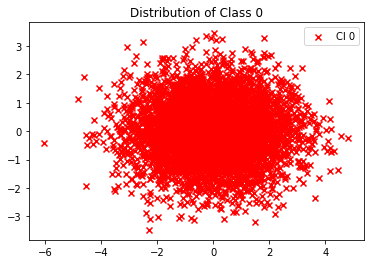

In [2]:
def generateClass0():
    theta0 = 0
    lmb01 = 2
    lmb02 = 1
    m0 = (0,  0)
    # computing u * u.T and later multiplying with lambda
    cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)],
             [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
    cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))],
             [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
    cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
    cov0_det = np.linalg.det(cov0)
    x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints/2)).T
    return x0,y0

x0, y0 = generateClass0()
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.legend()
plt.title('Distribution of Class 0')
plt.show()

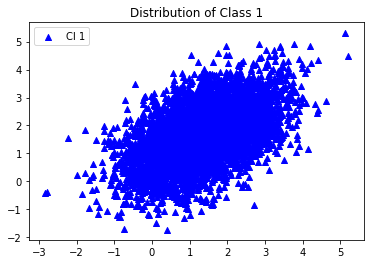

In [3]:
def generateClass1():
    # Mixture A
    theta1a = -3*pi/4
    lmb1a1 = 2
    lmb1a2 = 1/4
    m1a = (-2, 1)
    cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)],
             [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
    cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))],
             [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
    cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
    cov1a_det = np.linalg.det(cov1a)
    x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints/2)).T
    #print('Shape: ',x1a.shape,', ',y1a.shape,', ',cov1a)

    # Mixture B
    theta1b = pi/4
    lmb1b1 = 3
    lmb1b2 = 1
    m1b = (3, 2)
    cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)],
             [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
    cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))],
             [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
    cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
    cov1b_det = np.linalg.det(cov1b)
    x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints/2)).T
    #print('Shape: ',x1b.shape,', ',y1b.shape,', ',cov1b)

    # Class 1 (A * 0.33 +B * 0.66)
    y1 = np.array(y1a)* (1 / 3)+np.array(y1b)* (2 / 3)
    x1 = np.array(x1a)* (1 / 3)+np.array(x1b)* (2 / 3)
    return x1,y1

x1, y1 = generateClass1()
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.title('Distribution of Class 1')
plt.legend()
plt.show()

Shape; X: (10000,) , Y: (10000,)


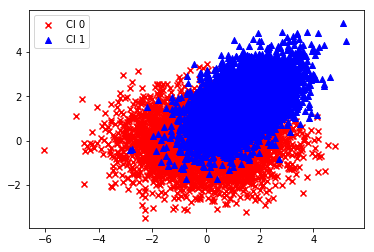

In [4]:
x = np.concatenate((x0, x1))
y = np.concatenate((y0, y1))
print('Shape; X:',x.shape,', Y:',y.shape)
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()
plt.show()

c0 = np.vstack((x0, y0)).T
c1 = np.vstack((x1, y1)).T
# ----------------------------------------
# Set up the [xi, yi] training data vector
# ----------------------------------------
X = np.concatenate((c0,c1), axis = 0)
Y = np.array([0]*int(n_inpoints/2) + [1]*int(n_inpoints/2)).reshape(n_inpoints,1)

### Training, test and validation sets (70:20:10)

##### Without Normalization

In [5]:
# Divide the data into Train Valid, Test
tot_count = n_inpoints
trn_count = int(0.7 * tot_count)
val_count = int(0.2 * tot_count)
tst_count = int(0.1 * tot_count)

# Shuffle X & Y values
sfl_idx = np.arange(0,tot_count)
np.random.shuffle(sfl_idx)

Xc0 = X[:,0]
Xc1 = X[:,1]
Xc0 = Xc0.reshape(tot_count,1)
Xc1 = Xc1.reshape(tot_count,1)
print(Xc1.shape)

train_X0 = Xc0[sfl_idx[np.arange(0,trn_count)]]
train_X1 = Xc1[sfl_idx[np.arange(0,trn_count)]]
train_Y = Y[sfl_idx[np.arange(0,trn_count)]]
n_samples = train_X1.shape[0]

valid_X0 = Xc0[sfl_idx[np.arange(trn_count,trn_count+val_count)]]
valid_X1 = Xc1[sfl_idx[np.arange(trn_count,trn_count+val_count)]]
valid_X  = np.vstack((valid_X0.T, valid_X1.T))
valid_Y = Y[sfl_idx[np.arange(trn_count,trn_count+val_count)]]

tests_X0 = Xc0[sfl_idx[np.arange(trn_count+val_count, tot_count)]]
tests_X1 = Xc1[sfl_idx[np.arange(trn_count+val_count, tot_count)]]
tests_X = np.vstack((tests_X0.T, tests_X1.T))
tests_Y = Y[sfl_idx[np.arange(trn_count+val_count, tot_count)]]

batchIndex = 0
def getNextTrainBatch(size):
    global batchIndex
    if((batchIndex + size) >= trn_count):
        size = trn_count-1
        batchIndex = 0 # recycle the batches from start
    
    #trn_sfl_idx = np.arange(0,trn_count)
    #np.random.shuffle(trn_sfl_idx)
    trn_X0_r1 =  train_X0[np.arange(batchIndex, batchIndex  + size)]
    trn_X1_r1 =  train_X1[np.arange(batchIndex, batchIndex  + size)]
    trn_Y_r1  =   train_Y[np.arange(batchIndex, batchIndex  + size)]
    #print(trn_X0_r1.shape)
    trn_X = np.vstack((trn_X0_r1.T, trn_X1_r1.T))
    #print((trn_X.T).shape)
    batchIndex = batchIndex  + size
    return trn_X.T, trn_Y_r1

print('Train: ',train_X0.shape, train_Y.shape)
print('Valid: ',valid_X.shape, valid_Y.shape)
print('Tests: ',tests_X.shape, tests_Y.shape)

(10000, 1)
Train:  (7000, 1) (7000, 1)
Valid:  (2, 2000) (2000, 1)
Tests:  (2, 1000) (1000, 1)


##### With Normalization

In [6]:
# ------------------- 
# Normalize the data
# ------------------- 

# Mean
train_X0_mean = np.mean(train_X0)
train_X1_mean = np.mean(train_X1)

# Standard deviation
train_X0_stddev = np.std(train_X0)
train_X1_stddev = np.std(train_X1)

# Normalization by scaling using standard deviation
train_X0_nrm = (train_X0 - train_X0_mean)/train_X0_stddev
train_X1_nrm = (train_X1 - train_X1_mean)/train_X1_stddev

print(train_X0_nrm.shape)
print(train_X1_nrm.shape)

train_X_nrm = np.vstack((train_X0_nrm.T, train_X1_nrm.T))

def getNextNormalizedTrainBatch(size):
    global batchIndex
    batchIndex = 0
    if((batchIndex + size) >= trn_count):
        size = trn_count-1
        batchIndex = 0 # recycle the batches from start
    # Shuffle the dataset each time
    trn_sfl_idx = np.arange(batchIndex, batchIndex  + size)
    np.random.shuffle(trn_sfl_idx)
    trn_X0_r1 =  train_X0_nrm[trn_sfl_idx[np.arange(batchIndex, batchIndex  + size)]]
    trn_X1_r1 =  train_X1_nrm[trn_sfl_idx[np.arange(batchIndex, batchIndex  + size)]]
    trn_Y_r1  =  train_Y[trn_sfl_idx[np.arange(batchIndex, batchIndex  + size)]]
    #print(trn_X0_r1.shape)
    trn_X = np.vstack((trn_X0_r1.T, trn_X1_r1.T))
    #print((trn_X.T).shape)
    batchIndex = batchIndex  + size
    return trn_X.T, trn_Y_r1

print('Train: ',train_X_nrm.shape, train_Y.shape)
#print('Valid: ',valid_X.shape, valid_Y.T)
#print('Tests: ',tests_X.shape, tests_Y.T)

(7000, 1)
(7000, 1)
Train:  (2, 7000) (7000, 1)


Epoch: 0050 cost= 0.086520113 W= [[0.22172657]] b= [[0.14955907]]
Epoch: 0100 cost= 0.075541042 W= [[0.26486838]] b= [[0.20467149]]
Epoch: 0150 cost= 0.073922656 W= [[0.2683425]] b= [[0.23227467]]
Epoch: 0200 cost= 0.073287055 W= [[0.26424062]] b= [[0.2495297]]
Epoch: 0250 cost= 0.072956562 W= [[0.25965545]] b= [[0.2615027]]
Epoch: 0300 cost= 0.072778456 W= [[0.25591362]] b= [[0.27013934]]
Epoch: 0350 cost= 0.072682224 W= [[0.25307462]] b= [[0.2764516]]
Epoch: 0400 cost= 0.072630167 W= [[0.2509661]] b= [[0.28108466]]
Epoch: 0450 cost= 0.072602026 W= [[0.24941045]] b= [[0.28448996]]
Epoch: 0500 cost= 0.072586790 W= [[0.2482652]] b= [[0.286994]]
Optimization Finished!
Training cost= 0.07258679 W= [[0.2482652]] b= [[0.286994]] 



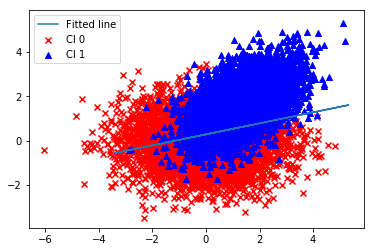

In [7]:
def linearRegression():
    # Parameters
    learning_rate = 0.01
    training_epochs = 500
    display_step = 50
    rng = np.random

    # tf Graph Input
    Xtf = tf.placeholder(tf.float32, [None, 1])
    Ytf = tf.placeholder(tf.float32, [None, 1])

    # Set model weights
    # figure tf.rand
    # tf.keras.initializer
    Wtf = tf.Variable(np.zeros([1,1]), dtype=tf.float32, name="weight")
    btf = tf.Variable(np.zeros([1,1]), dtype=tf.float32, name="bias")

    # Construct a linear model
    predtf = tf.add(tf.matmul(Xtf, Wtf), btf)

    # Mean squared error
    costtf = tf.reduce_sum(tf.pow(predtf-Ytf, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(costtf)

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # Start training
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            sess.run(optimizer, feed_dict={Xtf: train_X1, Ytf: train_Y})
            #Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(costtf, feed_dict={Xtf: train_X1, Ytf:train_Y})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(Wtf), "b=", sess.run(btf))
        print("Optimization Finished!")
        training_cost = sess.run(costtf, feed_dict={Xtf: train_X1, Ytf: train_Y})
        print("Training cost=", training_cost, "W=", sess.run(Wtf), "b=", sess.run(btf), '\n')

        #Graphic display plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
        plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
        plt.plot(train_X1, sess.run(Wtf) * train_X1 + sess.run(btf), label='Fitted line')
        plt.legend()
        plt.show()
        sess.close()

# Run Linear Regression
linearRegression()

### Neural Network implementation
- 1.(a) One hidden layer

In [55]:
def oneHiddenNeuralNetwork():
    # Parameters
    learning_rate = 0.001
    num_steps = 1000
    batch_size = 1000
    display_step = 100
    reg_const_lambda = 0.01

    # Network Parameters
    n_hidden_1 = 9 # 1st layer number of neurons
    num_input = 2  # data input (shape: 2 * 70)
    num_classes = 1 # total classes (0 or 1 based on the value)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias (initializing using random nromal)
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'out': tf.Variable(tf.random_normal([n_hidden_1, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }

    # Create model
    def one_neural_net(x):
        # Hidden fully connected layer, a1 
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        #layer_1 = tf.nn.relu(layer_1)
        # Output fully connected layer with a neuron for each class 
        out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = one_neural_net(X)
    output = tf.sigmoid(logits) # Convert output to a probability

    # Define loss and optimizer
    cel_loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
    reg_loss = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out']) # L2 regularization
    loss_op = tf.reduce_mean(cel_loss_op + reg_const_lambda*reg_loss) 
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Evaluate model (with test logits, for dropout to be disabled)
    # keep in mind boolean to float32 tensor output
    #correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    correct_pred = tf.cast(tf.greater(output, 0.5), tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_pred, Y), tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # Start training
    batchIndex = 0
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        for step in range(1, num_steps+1):
            batch_x, batch_y = getNextNormalizedTrainBatch(batch_size)
            # Run optimization op (backprop)
           # print(batch_x)
           # print(batch_y)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % display_step == 0 or step == 1:
                # Training batch loss and accuracy
                loss, acc, pred = sess.run([loss_op, accuracy, correct_pred], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                print("Trn Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Accuracy= " + \
                      "{:.3f}".format(100*acc))           
                #print("actuals:", batch_y.T)
                #print("predict:", pred.T)
                print("differr:", (pred.T != batch_y.T).sum())
                # Validation accuracy
                loss_v, acc_v, pred_v = sess.run([loss_op, accuracy, correct_pred], feed_dict={X: valid_X.T,
                                                                     Y: valid_Y})
                print("Val Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss_v) + ", Accuracy= " + \
                      "{:.3f}".format(100*acc_v))
                #print("actuals:", valid_Y.T)
                #print("predict:", pred_v.T)
                print("differr:", (pred_v.T != valid_Y.T).sum())

        print("Optimization Finished!")
        # Calculate accuracy for test data
        acc_t, pred_t = sess.run([accuracy,correct_pred], feed_dict={X: tests_X.T, Y: tests_Y})
        print("Test Accuracy:", "{:.3f}".format(100*acc_t))
        print("actuals:", tests_Y.shape)
        print("predict:", pred_t.shape)
        print("differr:", (pred_t.T != tests_Y.T).sum())
        sess.close()

# Execute
oneHiddenNeuralNetwork() 

Trn Step 1, Minibatch Loss= 1.3303, Accuracy= 30.100
differr: 699
Val Step 1, Minibatch Loss= 1.6977, Accuracy= 33.150
differr: 1337
Trn Step 100, Minibatch Loss= 1.0398, Accuracy= 36.600
differr: 634
Val Step 100, Minibatch Loss= 1.2065, Accuracy= 37.400
differr: 1252
Trn Step 200, Minibatch Loss= 0.8524, Accuracy= 47.100
differr: 529
Val Step 200, Minibatch Loss= 0.8916, Accuracy= 48.650
differr: 1027
Trn Step 300, Minibatch Loss= 0.7363, Accuracy= 59.500
differr: 405
Val Step 300, Minibatch Loss= 0.7172, Accuracy= 64.550
differr: 709
Trn Step 400, Minibatch Loss= 0.6629, Accuracy= 65.900
differr: 341
Val Step 400, Minibatch Loss= 0.6273, Accuracy= 73.700
differr: 526
Trn Step 500, Minibatch Loss= 0.6144, Accuracy= 71.800
differr: 282
Val Step 500, Minibatch Loss= 0.5822, Accuracy= 76.900
differr: 462
Trn Step 600, Minibatch Loss= 0.5808, Accuracy= 75.400
differr: 246
Val Step 600, Minibatch Loss= 0.5606, Accuracy= 77.900
differr: 442
Trn Step 700, Minibatch Loss= 0.5567, Accuracy= 7


- 1.(b) Two hidden layer

In [74]:
def twoHiddenNeuralNetwork():
    # Parameters
    learning_rate = 0.01
    num_steps = 1000
    batch_size = 1000
    display_step = 100
    reg_const_lambda = 0.01

    # Network Parameters
    n_hidden_1 = 4 # 1st layer number of neurons
    n_hidden_2 = 4 # 2nd layer number of neurons
    num_input = 2  # data input (shape: 2 * 70)
    num_classes = 1 # total classes (0 or 1 based on the value)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias (initializing using random nromal)
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }

    # Create model
    def two_neural_net(x):
        # Hidden fully connected layer, a1 
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        # Output fully connected layer with a neuron for each class 
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = two_neural_net(X)
    output = tf.sigmoid(logits) # Convert output to a probability

    # Define loss and optimizer
    cel_loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
    reg_loss = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2']) + tf.nn.l2_loss(weights['out']) # L2 regularization
    loss_op = tf.reduce_mean(cel_loss_op + reg_const_lambda*reg_loss) 
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)
    
    # Evaluate model (with test logits, for dropout to be disabled)
    # keep in mind boolean to float32 tensor output
    #correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    correct_pred = tf.cast(tf.greater(output, 0.5), tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(correct_pred, Y), tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # Start training
    batchIndex = 0
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        for step in range(1, num_steps+1):
            batch_x, batch_y = getNextNormalizedTrainBatch(batch_size)
            # Run optimization op (backprop)
           # print(batch_x)
           # print(batch_y)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % display_step == 0 or step == 1:
                # Training batch loss and accuracy
                loss, acc, pred = sess.run([loss_op, accuracy, correct_pred], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                print("Trn Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Accuracy= " + \
                      "{:.3f}".format(100*acc))           
                #print("actuals:", batch_y.T)
                #print("predict:", pred.T)
                print("differr:", (pred.T != batch_y.T).sum())
                # Validation accuracy
                loss_v, acc_v, pred_v = sess.run([loss_op, accuracy, correct_pred], feed_dict={X: valid_X.T,
                                                                     Y: valid_Y})
                print("Val Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss_v) + ", Accuracy= " + \
                      "{:.3f}".format(100*acc_v))
                #print("actuals:", valid_Y.T)
                #print("predict:", pred_v.T)
                print("differr:", (pred_v.T != valid_Y.T).sum())

        print("Optimization Finished!")
        # Calculate accuracy for test data
        acc_t, pred_t = sess.run([accuracy,correct_pred], feed_dict={X: tests_X.T, Y: tests_Y})
        print("Test Accuracy:", "{:.3f}".format(100*acc_t))
        print("actuals:", tests_Y.shape)
        print("predict:", pred_t.shape)
        print("differr:", (pred_t.T != tests_Y.T).sum())
        sess.close()

# Execute
twoHiddenNeuralNetwork() 

Trn Step 1, Minibatch Loss= 2.0676, Accuracy= 30.800
differr: 692
Val Step 1, Minibatch Loss= 2.1635, Accuracy= 27.600
differr: 1448
Trn Step 100, Minibatch Loss= 0.8971, Accuracy= 51.700
differr: 483
Val Step 100, Minibatch Loss= 1.0530, Accuracy= 51.000
differr: 980
Trn Step 200, Minibatch Loss= 0.8193, Accuracy= 63.700
differr: 363
Val Step 200, Minibatch Loss= 0.8234, Accuracy= 67.850
differr: 643
Trn Step 300, Minibatch Loss= 0.7975, Accuracy= 67.100
differr: 329
Val Step 300, Minibatch Loss= 0.7820, Accuracy= 73.050
differr: 539
Trn Step 400, Minibatch Loss= 0.7781, Accuracy= 69.600
differr: 304
Val Step 400, Minibatch Loss= 0.7564, Accuracy= 76.400
differr: 472
Trn Step 500, Minibatch Loss= 0.7584, Accuracy= 71.600
differr: 284
Val Step 500, Minibatch Loss= 0.7352, Accuracy= 78.150
differr: 437
Trn Step 600, Minibatch Loss= 0.7395, Accuracy= 73.900
differr: 261
Val Step 600, Minibatch Loss= 0.7148, Accuracy= 79.250
differr: 415
Trn Step 700, Minibatch Loss= 0.7202, Accuracy= 76.

### Results

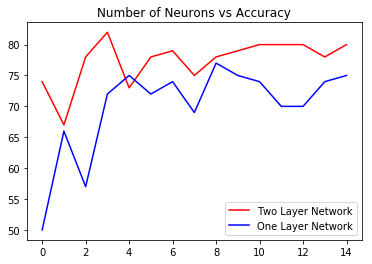

In [83]:
num_neurons = np.arange(0, 15)
accuracy_1_net = [50,66,57,72,75,72,74,69,77,75,74,70,70,74,75]
accuracy_2_net = [74,67,78,82,73,78,79,75,78,79,80,80,80,78,80]
plt.plot(num_neurons, accuracy_2_net,  c = 'red' , label = 'Two Layer Network')
plt.plot(num_neurons, accuracy_1_net, c = 'blue' , label = 'One Layer Network')
plt.legend()
plt.title("Number of Neurons vs Accuracy")
plt.show()